In [1]:
import os
import time
import random
import numpy as np
import renom as rm
from tqdm import tqdm
import matplotlib.pyplot as plt

from renom_img.api.segmentation.fcn import FCN8s
from renom_img.api.utility.distributor.distributor import ImageDistributor
from renom_img.api.utility.augmentation import Augmentation
from renom_img.api.utility.augmentation.process import *
from renom_img.api.utility.misc.display import draw_segment
from renom_img.api.utility.evaluate import EvaluatorSegmentation

from renom.cuda import set_cuda_active
from PIL import Image
set_cuda_active(True)

In [2]:
if not os.path.exists("VOCdevkit"):
    !wget http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar
    !tar -xvf VOCtrainval_11-May-2012.tar

In [3]:
class_map = ['background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 
             'bus', 'car', 'cat', 'chair', 'cow', 'diningtable',
             'dog', 'horse', 'motorbike', 'person', 'potted plant', 
             'sheep', 'sofa', 'train', 'tv/monitor']

In [4]:
prefix_path = 'VOCdevkit/VOC2012/'

In [5]:
train_image_path_list = []
train_annotation_path_list = []

with open(os.path.join(prefix_path, 'ImageSets', 'Segmentation', 'train.txt')) as f:
    txt = f.readlines()
    txt = [line.split('\n')[0] for line in txt]
    for i in range(len(txt)):
        train_image_path_list.append(os.path.join(prefix_path, 'JPEGImages', txt[i]+'.jpg'))
        train_annotation_path_list.append(os.path.join(prefix_path, 'SegmentationClass', txt[i]+'.png'))
                                          
valid_image_path_list = []
valid_annotation_path_list = []

with open(os.path.join(prefix_path, 'ImageSets', 'Segmentation', 'val.txt')) as f:
    txt = f.readlines()
    txt = [line.split('\n')[0] for line in txt]
    for i in range(len(txt)):
        valid_image_path_list.append(os.path.join(prefix_path, 'JPEGImages', txt[i]+'.jpg'))
        valid_annotation_path_list.append(os.path.join(prefix_path, 'SegmentationClass', txt[i]+'.png'))
        
print("Dataset size")
print("  Train:{}".format(len(train_image_path_list)))
print("  Valid:{}\n".format(len(valid_image_path_list)))
        

Dataset size
  Train:1464
  Valid:1449



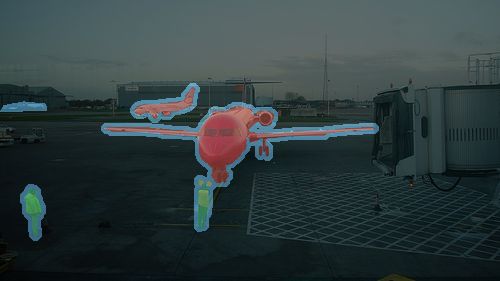

In [6]:
annot = np.array(Image.open(train_annotation_path_list[0]))
draw_segment(train_image_path_list[0], annot, show_background=True)

In [7]:
fcn8s = FCN8s(class_map, imsize=(224, 224), load_pretrained_weight=True, train_whole_network=True)

/home/ubuntu/.virtualenvs/python35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [8]:
def callback_end_epoch(epoch, model, avg_train_loss_list, avg_valid_loss_list):
    plt.clf()
    path = random.choice(valid_image_path_list)
    plt.imshow(draw_segment(path, fcn8s.predict(path)))
    plt.savefig("fcn/fig{:03d}.png".format(epoch))
    if epoch % 2 == 0 and epoch:
        model.save('fcn/model2_{:03d}.hdf5'.format(epoch))

In [9]:
if False:
    class_weight = fcn8s.build_class_weight(train_annotation_path_list)

In [10]:
augmentation = Augmentation([
                Flip(),
                WhiteNoise(),
                ContrastNorm([0.5, 1.0])
            ])

Epoch:000 Avg Train Loss:1.981 Avg Valid Loss:1.975: 100%|██████████| 363/363 [04:48<00:00,  1.89it/s]
Epoch:001 Avg Train Loss:1.598 Avg Valid Loss:1.477: 100%|██████████| 363/363 [04:44<00:00,  1.99it/s]
Epoch:002 Avg Train Loss:1.503 Avg Valid Loss:1.490: 100%|██████████| 363/363 [04:45<00:00,  1.98it/s]
Epoch:003 Avg Train Loss:1.453 Avg Valid Loss:1.410: 100%|██████████| 363/363 [04:50<00:00,  2.00it/s]
Epoch:004 Avg Train Loss:1.401 Avg Valid Loss:1.366: 100%|██████████| 363/363 [04:41<00:00,  1.95it/s]
Epoch:005 Avg Train Loss:1.372 Avg Valid Loss:1.336: 100%|██████████| 363/363 [04:41<00:00,  1.97it/s]
Epoch:006 Avg Train Loss:1.351 Avg Valid Loss:1.323: 100%|██████████| 363/363 [04:41<00:00,  1.96it/s]
Epoch:007 Avg Train Loss:1.336 Avg Valid Loss:1.311: 100%|██████████| 363/363 [04:41<00:00,  1.91it/s]
Epoch:008 Avg Train Loss:1.316 Avg Valid Loss:1.319: 100%|██████████| 363/363 [04:41<00:00,  2.01it/s]
Epoch:009 Avg Train Loss:1.307 Avg Valid Loss:1.403: 100%|██████████| 363

Epoch:079 Avg Train Loss:0.915 Avg Valid Loss:1.098: 100%|██████████| 363/363 [04:42<00:00,  1.97it/s]
Epoch:080 Avg Train Loss:0.898 Avg Valid Loss:1.054: 100%|██████████| 363/363 [04:42<00:00,  1.97it/s]
Epoch:081 Avg Train Loss:0.901 Avg Valid Loss:1.011: 100%|██████████| 363/363 [04:42<00:00,  1.94it/s]
Epoch:082 Avg Train Loss:0.906 Avg Valid Loss:0.987: 100%|██████████| 363/363 [04:41<00:00,  1.94it/s]
Epoch:083 Avg Train Loss:0.892 Avg Valid Loss:0.990: 100%|██████████| 363/363 [04:41<00:00,  1.99it/s]
Epoch:084 Avg Train Loss:0.897 Avg Valid Loss:1.124: 100%|██████████| 363/363 [04:41<00:00,  1.98it/s]
Epoch:085 Avg Train Loss:0.885 Avg Valid Loss:0.983: 100%|██████████| 363/363 [04:42<00:00,  1.98it/s]
Epoch:086 Avg Train Loss:0.882 Avg Valid Loss:1.002: 100%|██████████| 363/363 [04:41<00:00,  1.97it/s]
Epoch:087 Avg Train Loss:0.873 Avg Valid Loss:1.040: 100%|██████████| 363/363 [04:42<00:00,  1.93it/s]
Epoch:088 Avg Train Loss:0.862 Avg Valid Loss:0.991: 100%|██████████| 363

Epoch:158 Avg Train Loss:0.678 Avg Valid Loss:1.003: 100%|██████████| 363/363 [04:41<00:00,  2.06it/s]
Epoch:159 Avg Train Loss:0.677 Avg Valid Loss:0.998: 100%|██████████| 363/363 [04:42<00:00,  1.97it/s]
Epoch:160 Avg Train Loss:0.679 Avg Valid Loss:0.998: 100%|██████████| 363/363 [04:42<00:00,  1.95it/s]
Epoch:161 Avg Train Loss:0.675 Avg Valid Loss:1.003: 100%|██████████| 363/363 [04:42<00:00,  1.95it/s]
Epoch:162 Avg Train Loss:0.676 Avg Valid Loss:1.001: 100%|██████████| 363/363 [04:45<00:00,  1.85it/s]
Epoch:163 Avg Train Loss:0.676 Avg Valid Loss:0.998: 100%|██████████| 363/363 [04:49<00:00,  1.92it/s]
Epoch:164 Avg Train Loss:0.676 Avg Valid Loss:1.001: 100%|██████████| 363/363 [04:44<00:00,  1.94it/s]
Epoch:165 Avg Train Loss:0.674 Avg Valid Loss:1.004: 100%|██████████| 363/363 [04:43<00:00,  2.01it/s]
Epoch:166 Avg Train Loss:0.675 Avg Valid Loss:1.003: 100%|██████████| 363/363 [04:43<00:00,  1.93it/s]
Epoch:167 Avg Train Loss:0.678 Avg Valid Loss:1.000: 100%|██████████| 363

([1.9809120334888417,
  1.5975935511250314,
  1.5031612373766352,
  1.452886871952828,
  1.4008349075994857,
  1.3719316462024314,
  1.3514907006683246,
  1.3363146980603535,
  1.316315260904083,
  1.3068567779871936,
  1.3071803726622315,
  1.2937280602468169,
  1.2913007250900477,
  1.2812471938589232,
  1.2783671646007424,
  1.2707528612815617,
  1.2607544075107313,
  1.2516744538245956,
  1.2439075954299155,
  1.2418978574171744,
  1.225686662509793,
  1.2175275704574064,
  1.2082494904434746,
  1.1949417283300494,
  1.187781865316662,
  1.18298469719991,
  1.1637224143808658,
  1.1598485072290963,
  1.1581854308074941,
  1.1516372477584849,
  1.1496543685595195,
  1.1365607859658413,
  1.1237001118601346,
  1.127544578144459,
  1.1272747153467169,
  1.1198157701498823,
  1.1194860096511945,
  1.1118251572215492,
  1.1053146968285243,
  1.108775362779534,
  1.096586944545553,
  1.0961762475348562,
  1.0900527850363424,
  1.0802395963440827,
  1.0767044931487308,
  1.078320405848039

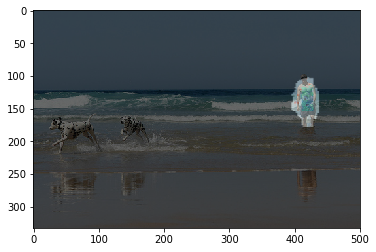

In [11]:
fcn8s.fit(train_img_path_list=train_image_path_list, train_annotation_list=train_annotation_path_list,
          valid_img_path_list=valid_image_path_list, valid_annotation_list=valid_annotation_path_list,
          batch_size=4, callback_end_epoch=callback_end_epoch, augmentation=augmentation, epoch=200)

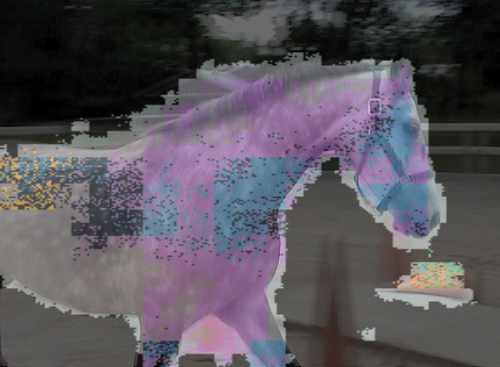

In [31]:
path = random.choice(valid_image_path_list)
draw_segment(path, fcn8s.predict(path), )